# Capstone Model Development with AWS Sagemaker Built-in Algorithms: Model Training

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

In [4]:
import pandas as pd

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
data = pd.read_csv('data.csv')

In [8]:
data.head()

,Unnamed: 0,outcome_type,sex_upon_outcome,age_upon_outcome_(years),outcome_month,outcome_year,outcome_weekday,outcome_hour,animal_type,breed,color,found_location,intake_condition,intake_type,sex_upon_intake,age_upon_intake_(years),intake_month,intake_year,intake_weekday,intake_hour
0,0,1,2,10,12,2017,4,0,2,1982,527,27351,3,3,2,10,12,2017,4,14
1,1,1,2,7,12,2014,2,16,2,1982,527,23499,3,2,2,7,12,2014,0,10
2,2,1,2,6,3,2014,2,17,2,1982,527,23500,3,2,2,6,3,2014,0,14
3,3,1,2,10,4,2014,1,15,2,830,449,25821,3,1,2,10,4,2014,6,15
4,4,1,2,16,11,2013,2,11,2,1880,183,3300,2,2,2,16,11,2013,2,9


In [9]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [10]:
import re
data = data.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [11]:
data.head()

,outcome_type,sex_upon_outcome,age_upon_outcome_years,outcome_month,outcome_year,outcome_weekday,outcome_hour,animal_type,breed,color,found_location,intake_condition,intake_type,sex_upon_intake,age_upon_intake_years,intake_month,intake_year,intake_weekday,intake_hour
0,1,2,10,12,2017,4,0,2,1982,527,27351,3,3,2,10,12,2017,4,14
1,1,2,7,12,2014,2,16,2,1982,527,23499,3,2,2,7,12,2014,0,10
2,1,2,6,3,2014,2,17,2,1982,527,23500,3,2,2,6,3,2014,0,14
3,1,2,10,4,2014,1,15,2,830,449,25821,3,1,2,10,4,2014,6,15
4,1,2,16,11,2013,2,11,2,1880,183,3300,2,2,2,16,11,2013,2,9


In [12]:
x_train, x_val, y_train, y_val = train_test_split(data.drop('outcome_type', axis=1), data['outcome_type'], test_size=0.2, random_state=42)

In [13]:
x_train.head()

,sex_upon_outcome,age_upon_outcome_years,outcome_month,outcome_year,outcome_weekday,outcome_hour,animal_type,breed,color,found_location,intake_condition,intake_type,sex_upon_intake,age_upon_intake_years,intake_month,intake_year,intake_weekday,intake_hour
18828,3,0,8,2014,2,13,2,1741,373,14768,3,3,0,0,7,2014,4,16
56226,1,0,9,2016,2,17,1,952,88,32034,3,3,1,0,9,2016,1,14
28389,2,2,3,2015,2,13,2,1761,56,30074,3,3,1,2,2,2015,4,18
61141,2,0,1,2017,5,17,1,946,62,4787,3,3,1,0,12,2016,4,10
61701,1,1,1,2017,1,16,2,670,356,12934,3,3,1,1,1,2017,0,14


In [14]:
le = LabelEncoder()

In [15]:
y_train = le.fit_transform(y_train)

In [16]:
y_val = le.transform(y_val)

In [17]:
!pip install lightgbm

  Using cached lightgbm-3.3.5-py3-none-manylinux1_x86_64.whl (2.0 MB)


In [18]:
import lightgbm as lgb

In [19]:
#using best hyperparameters from hpo output
model = lgb.LGBMClassifier(subsample = 1.0, reg_lambda= 1, num_leaves = 180, min_child_weight = 0.1, learning_rate  = 0.1, colsample_bytree = 0.5, boosting_type = 'dart', random_state=42)

In [20]:
model.fit(x_train, y_train, eval_set=[(x_val,y_val), (x_train,y_train)], verbose=20, eval_metric='logloss')

/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.43959	valid_0's binary_logloss: 0.452905
[40]	training's binary_logloss: 0.403812	valid_0's binary_logloss: 0.42421
[60]	training's binary_logloss: 0.368745	valid_0's binary_logloss: 0.392918
[80]	training's binary_logloss: 0.355996	valid_0's binary_logloss: 0.382596
[100]	training's binary_logloss: 0.338522	valid_0's binary_logloss: 0.369246


LGBMClassifier(boosting_type='dart', class_weight=None, colsample_bytree=0.5,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.1, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=180, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=1, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [21]:
print('Training accuracy {:.4f}'.format(model.score(x_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(x_val,y_val)))

Training accuracy 0.8702
Testing accuracy 0.8415


In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

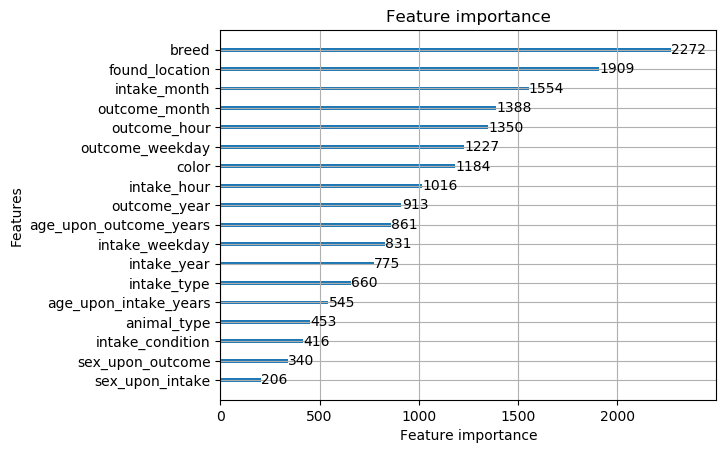

In [23]:
lgb.plot_importance(model)

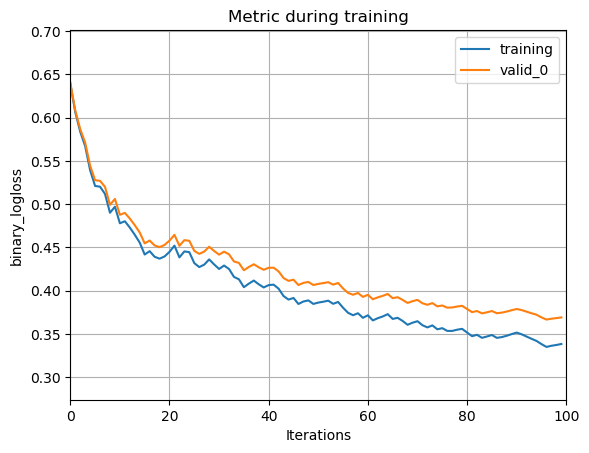

In [24]:
lgb.plot_metric(model)

In [29]:
y_pred = model.predict(x_val)

In [31]:
from sklearn import metrics

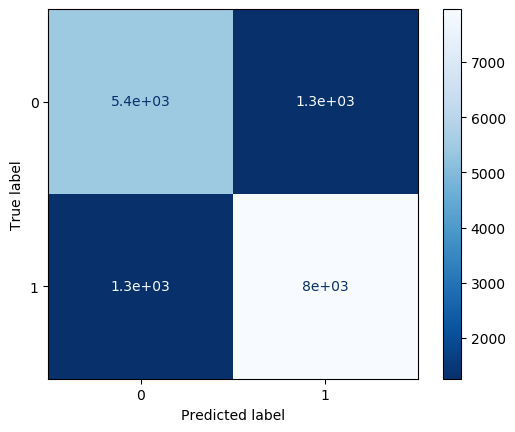

In [33]:
metrics.plot_confusion_matrix(model,x_val,y_val,cmap='Blues_r')

In [34]:
print(metrics.classification_report(y_val,model.predict(x_val)))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      6716
           1       0.86      0.86      0.86      9217

    accuracy                           0.84     15933
   macro avg       0.84      0.84      0.84     15933
weighted avg       0.84      0.84      0.84     15933

